# Welcome to our stock prediction notebook!
# In this notebook we are trying to predict closing price of the DJIA stock using the last 59 stock data and the opening price of the day from Yahoo Finance, and also the top 25 rated news of the current day from Reddit WorldNews Channel.

# The matirials for this project was taken from kaggle: https://www.kaggle.com/aaron7sun/stocknews?select=Combined_News_DJIA.csv
 
# In the next cell we are importing the libraries that we using in this project to manipulate the data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# In the next cell we importing the data from our github project: https://github.com/Eliot100/DJIA-stock-project

In [3]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

# In the cell below we copying the stock data, and normalize it.

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


# In the cell below we recognize the data. Every line contains stock data of 60 days in a row, the date of the stock data last day and top 25 rated news this day.

In [5]:
df_Combined = df_DJIA2.copy()
for i in range(0,59):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-59):
  for i in range(0, 59):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for i in range(0, df_DJIA2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
  for j in range(0, News_Date_array.shape[0]):
    df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-59]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [6]:
df_Combined.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan'

# In the two cells below we importing the library nltk and through it we convert the news to numerical value between 1 to -1 according to how much is good or bad.

In [7]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sna = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
df_Combined2 = df_Combined.copy()
for i in range(0, df_Combined2.shape[0]):
  # News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined2["Date"][i]]["News"].to_numpy()

  for j in range(0, 25):
    df_Combined2["Top"+str(j+1)][i] = sna.polarity_scores(df_Combined2["Top"+str(j+1)][i])["compound"]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# In the cell below we divide the data to training, testing, x and y. for the learning processes



In [149]:
df_final = df_Combined2.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
X_df = df_final.drop(['Close'], axis=1)
Y_df = df_final['Close']
rowsSize = X_df.shape[0]
test_size = 0.2
train_rowsSize = rowsSize*(1-test_size)
test_rowsSize = rowsSize*test_size
x_train, x_test, y_train, y_test = (X_df.tail(int(train_rowsSize)), X_df.head(int(test_rowsSize)), Y_df.tail(int(train_rowsSize)), Y_df.head(int(test_rowsSize)))
data_x_train = x_train.copy()
data_y_train = np.array(y_train.copy(), ndmin=2).reshape((y_train.shape[0], 1))
data_x_test = x_test.copy()
data_y_test = np.array(y_test.copy(), ndmin=2).reshape((y_test.shape[0], 1))
data_test_dates = np.flip(df_Combined2['Date'].head(int(test_rowsSize)).tail(int(test_rowsSize)))
opening_price_test = data_x_test.copy()['Open']
features = x_train.shape[1]

# In the cell below we importing the libraries that creating ours models, visualize ours results and displaying the time it took to train the models.

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  
import matplotlib.pyplot as plt
%matplotlib inline
import time
from google.colab import drive
drive.mount('/content/gdrive/')
saver = tf.train.Saver()

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# In the cells below we:
# 1) prepering our linear-regresion model
# 2) training our linear-regresion model
# 3) displaying the mean squared error progress graph
# 4) displaying the results of our linear-regresion model with the real testing values.

In [134]:
start_time = time.time()
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [135]:
train_losses = []
test_losses = []
i = 0
minLoss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
print('iter:', i,', loss:', minLoss)
for _ in range(3000):
    i += 1
    sess.run(update, feed_dict = {x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i,', loss:', temp_loss)
    if ((i % 10 == 0) & (temp_loss < minLoss)):
      minLoss = temp_loss
      saver.save(sess, "gdrive/My Drive/Deep learning poj/LR.ckpt") 

iter: 0 , loss: 0.7480454
iter: 1 , loss: 0.72877836
iter: 2 , loss: 0.7100045
iter: 3 , loss: 0.6917115
iter: 4 , loss: 0.67388713
iter: 5 , loss: 0.65651923
iter: 6 , loss: 0.6395967
iter: 7 , loss: 0.623108
iter: 8 , loss: 0.60704213
iter: 9 , loss: 0.5913884
iter: 10 , loss: 0.5761364
iter: 11 , loss: 0.56127596
iter: 12 , loss: 0.5467971
iter: 13 , loss: 0.5326901
iter: 14 , loss: 0.51894563
iter: 15 , loss: 0.5055544
iter: 16 , loss: 0.4925075
iter: 17 , loss: 0.47979623
iter: 18 , loss: 0.46741197
iter: 19 , loss: 0.45534647
iter: 20 , loss: 0.44359162
iter: 21 , loss: 0.4321395
iter: 22 , loss: 0.42098257
iter: 23 , loss: 0.4101131
iter: 24 , loss: 0.39952394
iter: 25 , loss: 0.38920796
iter: 26 , loss: 0.37915817
iter: 27 , loss: 0.3693678
iter: 28 , loss: 0.35983026
iter: 29 , loss: 0.35053915
iter: 30 , loss: 0.34148818
iter: 31 , loss: 0.3326712
iter: 32 , loss: 0.32408231
iter: 33 , loss: 0.3157157
iter: 34 , loss: 0.30756566
iter: 35 , loss: 0.2996267
iter: 36 , loss: 0.2

In [136]:
 print("linear regrression training time:' %s seconds " % (time.time() - start_time))

linear regrression training time:' 157.85894918441772 seconds 


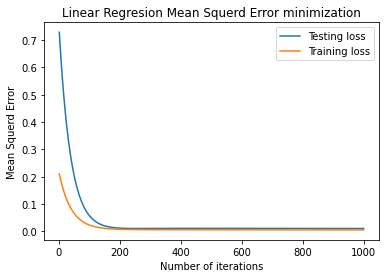

In [137]:
iter = np.arange(1,len(test_losses)+1)
plt.title('Linear Regresion Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

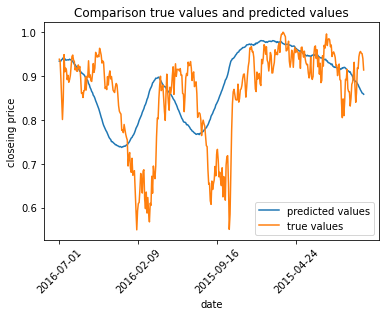

In [138]:
# https://stackoverflow.com/questions/50128668/how-to-adjust-tick-frequency-for-string-x-axis
saver.restore(sess, "gdrive/My Drive/Deep learning poj/LR.ckpt")
predicted_values = sess.run(y, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.gca().set_xticks(data_test_dates[::100])
plt.gca().set_xticklabels(data_test_dates[::100], rotation=45)
plt.show()

# In the cells below we:
# 1) prepering neural network with 1 hidden layer
# 2) show how we training the model
# 3) displaying the results

In [139]:
start_time = time.time()
step_size = 0.1
(hidden1_size, hidden2_size) = (300, 1)

minVal=-0.0001
maxVal=0.0001

x = tf.placeholder(tf.float32, shape=[None, features])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random.uniform(shape=[features, hidden1_size], minval=minVal, maxval=maxVal))
b1 = tf.Variable(tf.random.uniform(shape=[hidden1_size], minval=minVal, maxval=maxVal))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))

predict = tf.matmul(z1,W2) + b2

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
train_losses = []
test_losses = []
sess.run(init)
i = 0

In [ ]:
while (True):
  for _ in range(2):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
  
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)
    i += 1
    if (i % 10 == 0):
      minLoss = temp_loss
      tf.train.Saver().save(sess, "gdrive/My Drive/Deep learning poj/NN 1 hidden layer.ckpt") 
  if (test_losses[-2] - test_losses[-1] < 0):
    break


In [143]:
step_size = 0.05
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
minLoss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
while (True):
  for _ in range(3):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    i += 1
    print('iter:', i,', loss:', temp_loss)
    if (i % 10 == 0):
      minLoss = temp_loss
      tf.train.Saver().save(sess, "gdrive/My Drive/Deep learning poj/NN 1 hidden layer.ckpt") 
  if ((test_losses[-2] - test_losses[-1] < 0) & (test_losses[-3] - test_losses[-2] < 0)):
    break

print("get to model :nuriel network training :' %s seconds "  % (time.time() - start_time))

iter: 544 , loss: 0.030998051
iter: 545 , loss: 0.026611311
iter: 546 , loss: 0.023207089
iter: 547 , loss: 0.020619629
iter: 548 , loss: 0.01865978
iter: 549 , loss: 0.017184416
iter: 550 , loss: 0.016065193
iter: 551 , loss: 0.015178544
iter: 552 , loss: 0.014455496
iter: 553 , loss: 0.013877906
iter: 554 , loss: 0.013466993
iter: 555 , loss: 0.013187775
iter: 556 , loss: 0.013008443
iter: 557 , loss: 0.012892217
iter: 558 , loss: 0.012806665
iter: 559 , loss: 0.012744132
iter: 560 , loss: 0.012677432
iter: 561 , loss: 0.012589541
iter: 562 , loss: 0.012479645
iter: 563 , loss: 0.012357639
iter: 564 , loss: 0.012223208
iter: 565 , loss: 0.012069468
iter: 566 , loss: 0.011908233
iter: 567 , loss: 0.0117410505
iter: 568 , loss: 0.011575736
iter: 569 , loss: 0.011416273
iter: 570 , loss: 0.0112646725
iter: 571 , loss: 0.011122701
iter: 572 , loss: 0.010989094
iter: 573 , loss: 0.010863865
iter: 574 , loss: 0.010743345
iter: 575 , loss: 0.010616003
iter: 576 , loss: 0.010492568
iter: 577

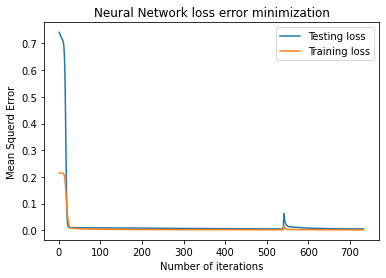

In [144]:
iter = np.arange(1,len(test_losses)+1)
plt.title('Neural Network loss error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

INFO:tensorflow:Restoring parameters from gdrive/My Drive/Deep learning poj/NN 1 hidden layer.ckpt


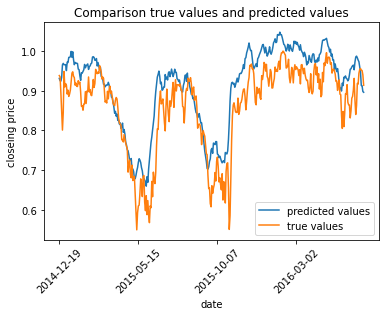

In [151]:
# https://stackoverflow.com/questions/50128668/how-to-adjust-tick-frequency-for-string-x-axis
saver.restore(sess, "gdrive/My Drive/Deep learning poj/NN 1 hidden layer.ckpt") 
predicted_values = sess.run(predict, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.gca().set_xticks(data_test_dates[::100])
plt.gca().set_xticklabels(data_test_dates[::100], rotation=45)
plt.show()

# In the cells below we:
# 1) prepering neural network with 2 hidden layer
# 2) show how we training the model
# 3) displaying the results

In [152]:
step_size = 0.1
(hidden1_size, hidden2_size) = (300, 1)

minVal=-0.0001
maxVal=0.0001

x = tf.placeholder(tf.float32, shape=[None, features])
y_ = tf.placeholder(tf.float32, shape=[None, 1])
W1 = tf.Variable(tf.random.uniform(shape=[features, hidden1_size], minval=minVal, maxval=maxVal))
b1 = tf.Variable(tf.random.uniform(shape=[hidden1_size], minval=minVal, maxval=maxVal))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))

predict = tf.matmul(z1,W2) + b2

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

saver.restore(sess, "gdrive/My Drive/Deep learning poj/NN 1 hidden layer.ckpt")
weights = sess.run(W1)
baieses = sess.run(b1)

INFO:tensorflow:Restoring parameters from gdrive/My Drive/Deep learning poj/NN 1 hidden layer.ckpt


In [156]:
step_size = 0.2
(hidden1_size, hidden2_size, hidden3_size) = (300, 100, 1)

minVal=-0.0001
maxVal=0.0001
minVal2=-0.1
maxVal2=0.1

x = tf.placeholder(tf.float32, shape=[None, features])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(weights)
b1 = tf.Variable(baieses)
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal2, maxval=maxVal2))
b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal2, maxval=maxVal2))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal2, maxval=maxVal2))
b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal2, maxval=maxVal2))
predict = tf.matmul(z2,W3) + b3
loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
train_losses = []
test_losses = []
sess.run(init)
i = 0

In [ ]:
while (True):
  for _ in range(2):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    i += 1
    print('iter:', i,', loss:', temp_loss)
    if (i % 10 == 0):
      if (minLoss > temp_loss):
        minLoss = temp_loss
        tf.train.Saver().save(sess, "gdrive/My Drive/Deep learning poj/NN 2 hidden layer.ckpt")
  if (test_losses[-2] - test_losses[-1] < 0):
    break

In [159]:
minLoss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
step_size = 0.05
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
# tf.train.Saver().restore(sess, "gdrive/My Drive/Deep learning poj/NN 2 hidden layer.ckpt")
while (True):
  for _ in range(3):
    for _ in range(50):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    i += 1
    print('iter:', i,', loss:', temp_loss)
    if (i % 10 == 0):
      if (minLoss > temp_loss):
        minLoss = temp_loss
        tf.train.Saver().save(sess, "gdrive/My Drive/Deep learning poj/NN 2 hidden layer.ckpt")
  if ((test_losses[-2] - test_losses[-1] < 0) & (test_losses[-3] - test_losses[-2] < 0)):
    break

iter: 33 , loss: 0.0023026336
iter: 34 , loss: 0.0022846353
iter: 35 , loss: 0.0022708438
iter: 36 , loss: 0.0022582375
iter: 37 , loss: 0.0022455566
iter: 38 , loss: 0.002233661
iter: 39 , loss: 0.0022223736
iter: 40 , loss: 0.0022116962
iter: 41 , loss: 0.0022014738
iter: 42 , loss: 0.0021915385
iter: 43 , loss: 0.002181927
iter: 44 , loss: 0.0021724286
iter: 45 , loss: 0.002163014
iter: 46 , loss: 0.0021539803
iter: 47 , loss: 0.0021454364
iter: 48 , loss: 0.0021366326
iter: 49 , loss: 0.0021279503
iter: 50 , loss: 0.002119524
iter: 51 , loss: 0.0021112375
iter: 52 , loss: 0.0021030833
iter: 53 , loss: 0.0020953591
iter: 54 , loss: 0.0020875386
iter: 55 , loss: 0.002080126
iter: 56 , loss: 0.0020730668
iter: 57 , loss: 0.0020663375
iter: 58 , loss: 0.0020592443
iter: 59 , loss: 0.0020520706
iter: 60 , loss: 0.0020451099
iter: 61 , loss: 0.0020382467
iter: 62 , loss: 0.002031537
iter: 63 , loss: 0.0020249612
iter: 64 , loss: 0.0020187611
iter: 65 , loss: 0.0020125757
iter: 66 , loss:

KeyboardInterrupt: ignored

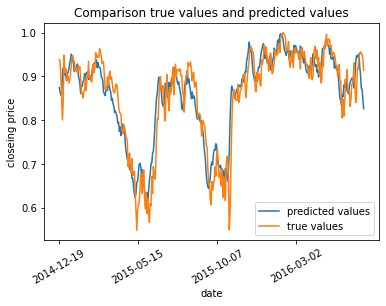

In [160]:
# saver.restore(sess, "gdrive/My Drive/Deep learning poj/NN 2 hidden layer.ckpt") 
predicted_values = sess.run(predict, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.gca().set_xticks(data_test_dates[::100])
plt.gca().set_xticklabels(data_test_dates[::100], rotation=30)
plt.show()

# In the cells below we:
# 1) prepering neural network with 3 hidden layer
# 2) show how we training the model
# 3) displaying the results

In [161]:
weights1 = sess.run(W1)
baieses1 = sess.run(b1)
weights2 = sess.run(W2)
baieses2 = sess.run(b2)

In [172]:
step_size = 0.05
(hidden1_size, hidden2_size, hidden3_size, hidden4_size) = (300, 100, 10, 1)

minVal=-0.1
maxVal=0.1

x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(weights1)
b1 = tf.Variable(baieses1)
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(weights2)
b2 = tf.Variable(baieses2)
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

W4 = tf.Variable(tf.random.uniform([hidden3_size, hidden4_size], minval=minVal, maxval=maxVal))
b4 = tf.Variable(tf.random.uniform(shape=[hidden4_size], minval=minVal, maxval=maxVal))
predict = tf.matmul(z3,W4) + b4

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
train_losses = []
test_losses = []
sess.run(init)
i = 0

In [ ]:
while (True):
  for _ in range(2):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    i += 1
    print('iter:', i,', loss:', temp_loss)
    if (i % 10 == 0):
      if (minLoss > temp_loss):
        minLoss = temp_loss
        tf.train.Saver().save(sess, "gdrive/My Drive/Deep learning poj/NN 3 hidden layer.ckpt")
  if (test_losses[-2] - test_losses[-1] <= 0):
    break

In [174]:
step_size = 0.001
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)
while (True):
  for _ in range(3):
    for _ in range(50):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    i += 1
    print('iter:', i,', loss:', temp_loss)
    if (i % 10 == 0):
      if (minLoss > temp_loss):
        minLoss = temp_loss
        tf.train.Saver().save(sess, "gdrive/My Drive/Deep learning poj/NN 3 hidden layer.ckpt")
  if ((test_losses[-2] - test_losses[-1] <= 0) and (test_losses[-3] - test_losses[-2] <= 0)):
    break

iter: 39 , loss: 0.0017603163
iter: 40 , loss: 0.0017520994
iter: 41 , loss: 0.0017440433
iter: 42 , loss: 0.0017381425
iter: 43 , loss: 0.0017333614
iter: 44 , loss: 0.001728355
iter: 45 , loss: 0.0017236845
iter: 46 , loss: 0.001719118
iter: 47 , loss: 0.001714714
iter: 48 , loss: 0.001710345
iter: 49 , loss: 0.0017057133
iter: 50 , loss: 0.0017014142
iter: 51 , loss: 0.0016968298
iter: 52 , loss: 0.0016924101
iter: 53 , loss: 0.0016882208
iter: 54 , loss: 0.0016846354
iter: 55 , loss: 0.0016808505
iter: 56 , loss: 0.0016775292
iter: 57 , loss: 0.0016737385
iter: 58 , loss: 0.0016700606
iter: 59 , loss: 0.0016665515
iter: 60 , loss: 0.0016628163
iter: 61 , loss: 0.0016592622
iter: 62 , loss: 0.0016556463
iter: 63 , loss: 0.0016522934
iter: 64 , loss: 0.0016486489
iter: 65 , loss: 0.0016451
iter: 66 , loss: 0.00164207
iter: 67 , loss: 0.0016395921
iter: 68 , loss: 0.0016371598
iter: 69 , loss: 0.0016348943
iter: 70 , loss: 0.0016325862
iter: 71 , loss: 0.0016304549
iter: 72 , loss: 0.

KeyboardInterrupt: ignored

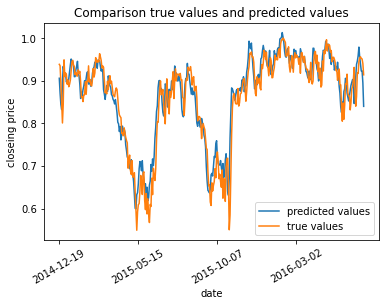

In [177]:
# saver.restore(sess, "gdrive/My Drive/Deep learning poj/NN 3 hidden layer.ckpt")
predicted_values = sess.run(predict, feed_dict = {x: data_x_test})
plt.title('Comparison true values and predicted values')
plt.plot(data_test_dates, predicted_values, label='predicted values')
plt.plot(data_test_dates, data_y_test, label='true values')
plt.legend()
plt.xlabel('date')
plt.ylabel('closeing price')
plt.gca().set_xticks(data_test_dates[::100])
plt.gca().set_xticklabels(data_test_dates[::100], rotation=30)
plt.show()